<a href="https://colab.research.google.com/github/thedarkscepter/turbo-enigma/blob/main/119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [9]:
import pandas as pd
c_name = ['pregnant', 'glucose', 'bp', 'skin', ' insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('data.csv', names = c_name).iloc[1:]
print(df.head())

  pregnant glucose  bp skin  insulin   bmi pedigree age label
1        6     148  72   35        0  33.6    0.627  50     1
2        1      85  66   29        0  26.6    0.351  31     0
3        8     183  64    0        0  23.3    0.672  32     1
4        1      89  66   23       94  28.1    0.167  21     0
5        0     137  40   35      168  43.1    2.288  33     1


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
features = ['pregnant', 'glucose', 'bp', 'skin', ' insulin', 'bmi', 'pedigree', 'age', 'label']
X = df[features]
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy', metrics.accuracy_score(y_test, y_pred))

accuracy 1.0


In [32]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus 
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])
print(dot_data.getvalue())                                                  

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<label &le; 0.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<gini = 0.0<br/>samples = 354<br/>value = [354, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 183<br/>value = [0, 183]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


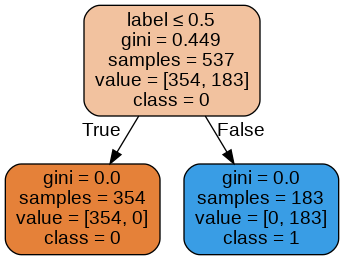

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [39]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy', metrics.accuracy_score(y_test, y_pred))


accuracy 1.0


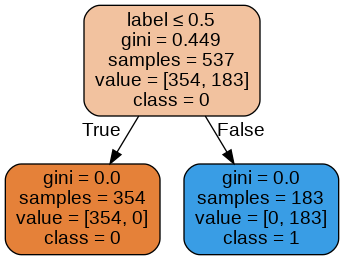

In [37]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())